In [ ]:
# Import library utama
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/praktikumML/tugas04"

In [ ]:
df = pd.read_csv(path + "/data/calonpembelimobil.csv")
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [ ]:
print("=== Informasi Dataset ===")
print(df.info())

print("\n=== Statistik Deskriptif ===")
print(df.describe())

print("\n=== Cek Missing Value ===")
print(df.isnull().sum())


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB
None

=== Statistik Deskriptif ===
                ID         Usia       Status      Kelamin  Memiliki_Mobil  \
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.00000   
mean    500.500000    43.532000     1.469000     0.481000         0.95200   
std     288.819436    12.672078     1.073402     0.499889         0.80146   
min       1.000000    24.000000     0.000000     0.000000         0.00000   
25%     250.750000    3

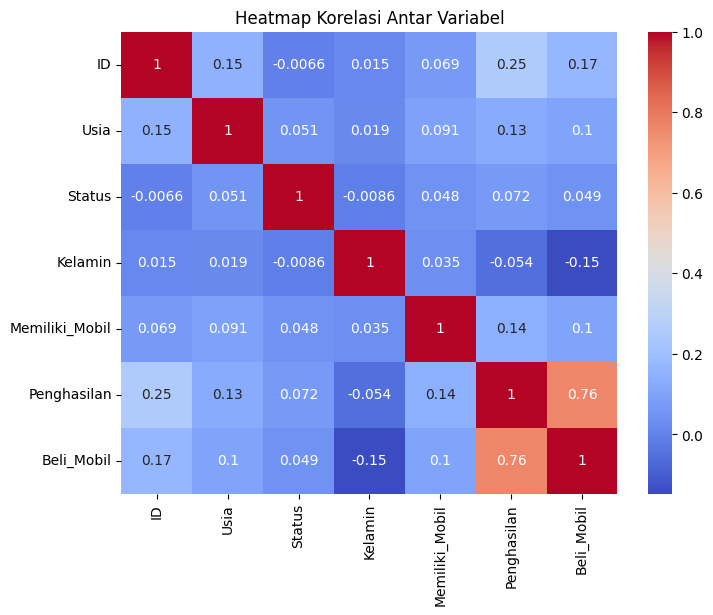

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

In [ ]:
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Ukuran Data Training: {X_train.shape}")
print(f"Ukuran Data Testing : {X_test.shape}")

Ukuran Data Training: (800, 5)
Ukuran Data Testing : (200, 5)


In [ ]:
# Preprocessing: scaling fitur numerik
numeric_features = ['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)]
)

# Pipeline model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42))
])

# Training
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Usia', 'Status', 'Kelamin',
                                                   'Memiliki_Mobil',
                                                   'Penghasilan'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Hitung metrik evaluasi
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Akurasi   : {acc:.4f}")
print(f"Presisi   : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-Score  : {f1:.4f}")
print(f"ROC-AUC   : {roc_auc:.4f}")


Akurasi   : 0.9300
Presisi   : 0.9829
Recall    : 0.9055
F1-Score  : 0.9426
ROC-AUC   : 0.9768


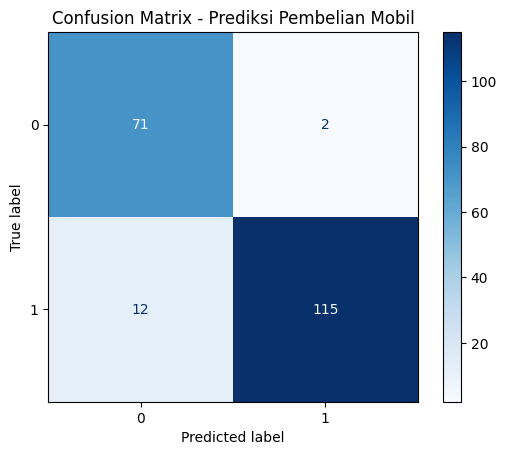

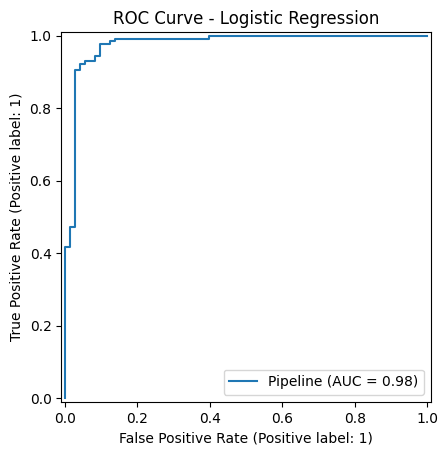

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix - Prediksi Pembelian Mobil")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()


In [ ]:
# Ambil model yang sudah dilatih
clf = model.named_steps['classifier']
coef = pd.DataFrame({
    'Fitur': numeric_features,
    'Koefisien': clf.coef_[0],
    'Odds Ratio': np.exp(clf.coef_[0])
})
coef


,Fitur,Koefisien,Odds Ratio
0,Usia,-0.045073,0.955928
1,Status,-0.132093,0.876259
2,Kelamin,-0.596863,0.550536
3,Memiliki_Mobil,0.078968,1.082169
4,Penghasilan,4.568333,96.383273


In [ ]:
# Contoh: pelanggan baru
data_baru = pd.DataFrame({
    'Usia': [30, 22],
    'Status': [2, 0],
    'Kelamin': [0, 1],
    'Memiliki_Mobil': [1, 0],
    'Penghasilan': [250, 80]
})

prediksi = model.predict(data_baru)
prob = model.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prob_BeliMobil'] = prob
hasil['Prediksi'] = prediksi
hasil

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Prob_BeliMobil,Prediksi
0,30,2,0,1,250,0.813463,1
1,22,0,1,0,80,0.000431,0
